<a href="https://colab.research.google.com/github/BogereMark879/My-project/blob/main/Pima_Indian_Diabets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score , train_test_split , RandomizedSearchCV , GridSearchCV
from sklearn.metrics import classification_report
from scipy import stats

In [3]:
diabetes=pd.read_csv('/content/drive/MyDrive/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


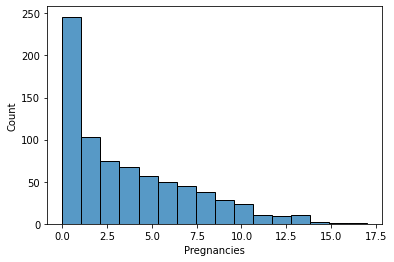

In [11]:
sns.histplot(diabetes['Pregnancies'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


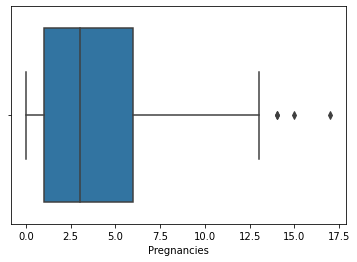

In [13]:
sns.boxplot(diabetes['Pregnancies'])

In [14]:
diabetes[diabetes['Pregnancies'] > 13]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


In [15]:
diabetes.loc[diabetes['Pregnancies'] > 13 , 'Pregnancies'] = np.nan

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


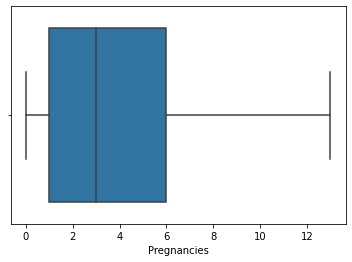

In [17]:
sns.boxplot(diabetes['Pregnancies'])

<ipython-input-19-20fca1f1babf>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(diabetes.corr(), dtype=np.bool))


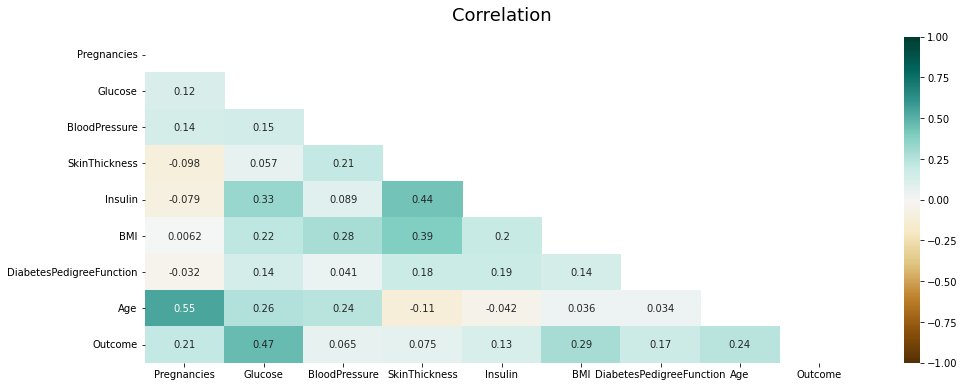

In [19]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(diabetes.corr(), dtype=np.bool))
heatmap = sns.heatmap(diabetes.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation', fontdict={'fontsize':18}, pad=16);

In [21]:
X = diabetes.drop(columns=['Outcome'])
y = diabetes['Outcome']

In [22]:
imputer = KNNImputer(n_neighbors=5)
imputer.fit(X)

KNNImputer()

In [23]:
X = imputer.transform(X)

In [24]:
st = StandardScaler()
st.fit(X)
X = st.transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

models = {
    "lr" : LogisticRegression(random_state=123),
    "DT" : DecisionTreeClassifier(random_state=123),
    "RF" : RandomForestClassifier(max_depth=2, random_state=123),
    'KNN' : KNeighborsClassifier(),
    "SVM" : SVC(),
    "Ada" : AdaBoostClassifier(random_state=123),
    "GBC" : GradientBoostingClassifier(random_state=123),
    "HGBC" : HistGradientBoostingClassifier(random_state=123)
}

In [27]:
for model_name, model in models.items():
    print(model_name + " :")
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(cv_scores)
    print("mean :", cv_scores.mean())
    print("std :", cv_scores.std())
    print("\n")

lr :
[0.75609756 0.81300813 0.73170732 0.7398374  0.78688525]
mean : 0.7655071304811408
std : 0.03034228505927917


DT :
[0.72357724 0.77235772 0.68292683 0.76422764 0.70491803]
mean : 0.7296014927362389
std : 0.03420863804535935


RF :
[0.69918699 0.79674797 0.76422764 0.7398374  0.75409836]
mean : 0.7508196721311475
std : 0.03189506476969438


KNN :
[0.68292683 0.7804878  0.7398374  0.7398374  0.76229508]
mean : 0.7410769025723043
std : 0.032826617626446675


SVM :
[0.75609756 0.82113821 0.7398374  0.75609756 0.7704918 ]
mean : 0.7687325069972012
std : 0.027941596231316135


Ada :
[0.77235772 0.82113821 0.75609756 0.74796748 0.74590164]
mean : 0.7686925229908037
std : 0.02782649382219009


GBC :
[0.7804878  0.81300813 0.77235772 0.75609756 0.80327869]
mean : 0.7850459816073571
std : 0.02065958989339194


HGBC :
[0.76422764 0.76422764 0.7398374  0.76422764 0.76229508]
mean : 0.7589630814340931
std : 0.009592088225785236




In [28]:
Ada = AdaBoostClassifier(random_state=123 )

grid_list = {
    "learning_rate": [1,0.01,0.001],
    "n_estimators": [20,15,10,5],
}
              
grid_search = GridSearchCV(Ada, param_grid = grid_list, cv = 4,) 
grid_search.fit(X_train , y_train)


print("gridSearch Best Score :",grid_search.best_score_)
print("gridSearch Best params :",grid_search.best_params_)

gridSearch Best Score : 0.768695356930651
gridSearch Best params : {'learning_rate': 1, 'n_estimators': 15}


In [29]:
bestModel = AdaBoostClassifier(random_state=123 , learning_rate= 1, n_estimators= 20)

In [30]:
bestModel.fit(X_train,y_train)
y_pred = bestModel.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80        99
           1       0.64      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154

